In [5]:
data_2010 = pd.read_csv('Resources/ghe2010csv.csv', header = 6)
data_2015 = pd.read_csv('Resources/ghe2015csv.csv', header = 6)
data_2019 = pd.read_csv('Resources/ghe2019csv.csv', header = 6)

In [6]:
data_2010.columns = data_2010.columns.str.replace('Unnamed: 4', 'Cause Category').str.replace('Unnamed: 5', 'Disease').str.replace('Member State\n(See Notes for explanation of colour codes)', 'Condition')
data_2015.columns = data_2015.columns.str.replace('Unnamed: 4', 'Cause Category').str.replace('Unnamed: 5', 'Disease').str.replace('Member State\n(See Notes for explanation of colour codes)', 'Condition')
data_2019.columns = data_2019.columns.str.replace('Unnamed: 4', 'Cause Category').str.replace('Unnamed: 5', 'Disease').str.replace('Member State\n(See Notes for explanation of colour codes)', 'Condition')

# data_2010

In [7]:
data_2010.columns = data_2010.columns.str.replace('Germany', '2010 Germany').str.replace('Netherlands', '2010 Netherlands').str.replace('Switzerland', '2010 Switzerland').str.replace('United Kingdom', '2010 UK').str.replace('United States of America', '2010 US')
data_2015.columns = data_2015.columns.str.replace('Germany', '2015 Germany').str.replace('Netherlands', '2015 Netherlands').str.replace('Switzerland', '2015 Switzerland').str.replace('United Kingdom', '2015 UK').str.replace('United States of America', '2015 US')
data_2019.columns = data_2019.columns.str.replace('Germany', '2019 Germany').str.replace('Netherlands', '2019 Netherlands').str.replace('Switzerland', '2019 Switzerland').str.replace('United Kingdom', '2019 UK').str.replace('United States of America', '2019 US')

# data_2010

In [8]:
data_2010 = data_2010[['Sex', 'GHE code', 'Disease', 
                      '2010 Germany', '2010 Netherlands','2010 Switzerland','2010 UK', '2010 US',]]
data_2015 = data_2015[['Sex', 'GHE code', 'Disease',
                      '2015 Germany', '2015 Netherlands','2015 Switzerland','2015 UK', '2015 US',]]
data_2019 = data_2019[['Sex', 'GHE code', 'Disease', 
                      '2019 Germany', '2019 Netherlands','2019 Switzerland','2019 UK', '2019 US',]]


In [9]:
data_2010.loc[data_2010['Sex']=='Persons']
data_2015.loc[data_2015['Sex']=='Persons']
data_2019.loc[data_2019['Sex']=='Persons']

,Sex,GHE code,Disease,2019 Germany,2019 Netherlands,2019 Switzerland,2019 UK,2019 US
2,Persons,NaN,NaN,"83,517","17,097","8,591","67,530","329,065"
3,Persons,0.0,NaN,845.4,153.1,69.1,614.5,2949.2
4,Persons,10.0,NaN,40.2,9.2,3.3,50.1,156.4
5,Persons,20.0,NaN,16.2,3.5,1.0,7.4,73.4
6,Persons,30.0,Tuberculosis,0.3,0.0,0.0,0.4,0.5
...,...,...,...,...,...,...,...,...
202,Persons,1590.0,Other unintentional injuries,8.2,1.6,0.4,5.5,26.0
203,Persons,1600.0,NaN,11.1,2.1,1.3,6.2,73.3
204,Persons,1610.0,Self-harm,10.3,2.0,1.2,5.3,53.1
205,Persons,1620.0,Interpersonal violence,0.8,0.1,0.0,0.9,19.0


In [10]:
data_2010_summary = data_2010.loc[data_2010['Sex']=='Persons']
data_2015_summary = data_2015.loc[data_2015['Sex']=='Persons']
data_2019_summary = data_2019.loc[data_2019['Sex']=='Persons']

# data_2010_summary

In [11]:
merge_columns = ['GHE code', '2015 Germany', '2015 Netherlands','2015 Switzerland','2015 UK', '2015 US']
merged_2010_2015 = pd.merge(data_2010_summary, data_2015_summary[merge_columns], left_on='GHE code', right_on='GHE code',
                            how='left')

# merged_2010_2015

In [12]:
merge_columns2 = ['GHE code', '2019 Germany', '2019 Netherlands','2019 Switzerland','2019 UK', '2019 US']
mortality_tmi = pd.merge(merged_2010_2015, data_2019_summary[merge_columns2], left_on='GHE code', right_on='GHE code',
                            how='left')

In [13]:
mortality_tmi

,Sex,GHE code,Disease,2010 Germany,2010 Netherlands,2010 Switzerland,2010 UK,2010 US,2015 Germany,2015 Netherlands,2015 Switzerland,2015 UK,2015 US,2019 Germany,2019 Netherlands,2019 Switzerland,2019 UK,2019 US
0,Persons,NaN,NaN,"80,827","16,683","7,809","63,460","309,011","81,787","16,938","8,297","65,860","320,878","83,517","17,097","8,591","67,530","329,065"
1,Persons,0.0,NaN,836.9,135.3,62.0,568.3,2470.5,928.9,146.2,67.8,619.2,2713.5,845.4,153.1,69.1,614.5,2949.2
2,Persons,10.0,NaN,38.8,8.6,2.3,41.6,140.7,46.5,8.5,3.1,49.9,153.3,40.2,9.2,3.3,50.1,156.4
3,Persons,20.0,NaN,15.8,2.3,0.8,6.5,69.8,21.0,3.7,0.9,7.5,73.7,16.2,3.5,1.0,7.4,73.4
4,Persons,30.0,Tuberculosis,0.4,0.1,0.0,0.4,0.6,0.3,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.4,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Persons,1590.0,Other unintentional injuries,5.7,1.4,0.4,4.6,20.6,7.0,1.4,0.4,4.7,22.4,8.2,1.6,0.4,5.5,26.0
201,Persons,1600.0,NaN,11.5,1.8,1.2,6.1,59.0,11.6,2.1,1.3,6.7,65.8,11.1,2.1,1.3,6.2,73.3
202,Persons,1610.0,Self-harm,10.7,1.6,1.1,5.0,40.5,10.9,2.0,1.2,5.8,46.2,10.3,2.0,1.2,5.3,53.1
203,Persons,1620.0,Interpersonal violence,0.8,0.2,0.1,1.0,16.9,0.8,0.1,0.1,0.9,18.4,0.8,0.1,0.0,0.9,19.0


In [14]:
mortality_data = mortality_tmi.drop(columns =['Sex', 'GHE code'])
mortality_data

,Disease,2010 Germany,2010 Netherlands,2010 Switzerland,2010 UK,2010 US,2015 Germany,2015 Netherlands,2015 Switzerland,2015 UK,2015 US,2019 Germany,2019 Netherlands,2019 Switzerland,2019 UK,2019 US
0,NaN,"80,827","16,683","7,809","63,460","309,011","81,787","16,938","8,297","65,860","320,878","83,517","17,097","8,591","67,530","329,065"
1,NaN,836.9,135.3,62.0,568.3,2470.5,928.9,146.2,67.8,619.2,2713.5,845.4,153.1,69.1,614.5,2949.2
2,NaN,38.8,8.6,2.3,41.6,140.7,46.5,8.5,3.1,49.9,153.3,40.2,9.2,3.3,50.1,156.4
3,NaN,15.8,2.3,0.8,6.5,69.8,21.0,3.7,0.9,7.5,73.7,16.2,3.5,1.0,7.4,73.4
4,Tuberculosis,0.4,0.1,0.0,0.4,0.6,0.3,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.4,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Other unintentional injuries,5.7,1.4,0.4,4.6,20.6,7.0,1.4,0.4,4.7,22.4,8.2,1.6,0.4,5.5,26.0
201,NaN,11.5,1.8,1.2,6.1,59.0,11.6,2.1,1.3,6.7,65.8,11.1,2.1,1.3,6.2,73.3
202,Self-harm,10.7,1.6,1.1,5.0,40.5,10.9,2.0,1.2,5.8,46.2,10.3,2.0,1.2,5.3,53.1
203,Interpersonal violence,0.8,0.2,0.1,1.0,16.9,0.8,0.1,0.1,0.9,18.4,0.8,0.1,0.0,0.9,19.0


In [15]:
mortality_data.columns

Index(['Disease', '2010 Germany', '2010 Netherlands', '2010 Switzerland',
       '2010 UK', '2010 US', '2015 Germany', '2015 Netherlands',
       '2015 Switzerland', '2015 UK', '2015 US', '2019 Germany',
       '2019 Netherlands', '2019 Switzerland', '2019 UK', '2019 US'],
      dtype='object')

In [16]:
columns_to_convert = ['2010 Germany', '2010 Netherlands', '2010 Switzerland', '2010 UK',
       '2010 US', '2015 Germany', '2015 Netherlands', '2015 Switzerland',
       '2015 UK', '2015 US', '2019 Germany', '2019 Netherlands',
       '2019 Switzerland', '2019 UK', '2019 US']

#copy df
mortality_data_copy = mortality_data.copy()

# Convert specified columns to float 
mortality_data_copy[columns_to_convert] = mortality_data_copy[columns_to_convert].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))

# Check the data types of columns
print("\nData Types:")
print(mortality_data_copy.dtypes)


Data Types:
Disease              object
2010 Germany        float64
2010 Netherlands    float64
2010 Switzerland    float64
2010 UK             float64
2010 US             float64
2015 Germany        float64
2015 Netherlands    float64
2015 Switzerland    float64
2015 UK             float64
2015 US             float64
2019 Germany        float64
2019 Netherlands    float64
2019 Switzerland    float64
2019 UK             float64
2019 US             float64
dtype: object


In [17]:
mortality_data_copy.iloc[0,0]='Population'
mortality_data_copy.iloc[1,0]='All Deaths'
mortality_data_copy

,Disease,2010 Germany,2010 Netherlands,2010 Switzerland,2010 UK,2010 US,2015 Germany,2015 Netherlands,2015 Switzerland,2015 UK,2015 US,2019 Germany,2019 Netherlands,2019 Switzerland,2019 UK,2019 US
0,Population,80827.0,16683.0,7809.0,63460.0,309011.0,81787.0,16938.0,8297.0,65860.0,320878.0,83517.0,17097.0,8591.0,67530.0,329065.0
1,All Deaths,836.9,135.3,62.0,568.3,2470.5,928.9,146.2,67.8,619.2,2713.5,845.4,153.1,69.1,614.5,2949.2
2,NaN,38.8,8.6,2.3,41.6,140.7,46.5,8.5,3.1,49.9,153.3,40.2,9.2,3.3,50.1,156.4
3,NaN,15.8,2.3,0.8,6.5,69.8,21.0,3.7,0.9,7.5,73.7,16.2,3.5,1.0,7.4,73.4
4,Tuberculosis,0.4,0.1,0.0,0.4,0.6,0.3,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.4,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Other unintentional injuries,5.7,1.4,0.4,4.6,20.6,7.0,1.4,0.4,4.7,22.4,8.2,1.6,0.4,5.5,26.0
201,NaN,11.5,1.8,1.2,6.1,59.0,11.6,2.1,1.3,6.7,65.8,11.1,2.1,1.3,6.2,73.3
202,Self-harm,10.7,1.6,1.1,5.0,40.5,10.9,2.0,1.2,5.8,46.2,10.3,2.0,1.2,5.3,53.1
203,Interpersonal violence,0.8,0.2,0.1,1.0,16.9,0.8,0.1,0.1,0.9,18.4,0.8,0.1,0.0,0.9,19.0


In [32]:
md = mortality_data_copy.T
md = md.set_axis(md.iloc[0],axis=1)
md = md.iloc[1:]
md

Disease,Population,All Deaths,NaN,NaN,Tuberculosis,STDs excluding HIV,a.,b.,c.,d.,...,Falls,"Fire, heat and hot substances",Drowning,Exposure to mechanical forces,Natural disasters,Other unintentional injuries,NaN,Self-harm,Interpersonal violence,Collective violence and legal intervention
2010 Germany,80827.0,836.9,38.8,15.8,0.4,0.0,0.0,NaN,NaN,NaN,...,10.0,0.4,0.4,0.4,0.0,5.7,11.5,10.7,0.8,0.0
2010 Netherlands,16683.0,135.3,8.6,2.3,0.1,0.0,0.0,NaN,NaN,NaN,...,1.6,0.0,0.1,0.1,0.0,1.4,1.8,1.6,0.2,0.0
2010 Switzerland,7809.0,62.0,2.3,0.8,0.0,0.0,0.0,NaN,NaN,NaN,...,1.5,0.0,0.1,0.0,0.0,0.4,1.2,1.1,0.1,0.0
2010 UK,63460.0,568.3,41.6,6.5,0.4,0.1,0.0,NaN,NaN,NaN,...,4.7,0.3,0.3,0.4,0.0,4.6,6.1,5.0,1.0,0.1
2010 US,309011.0,2470.5,140.7,69.8,0.6,0.2,0.0,NaN,0.0,NaN,...,26.4,2.9,3.9,2.8,0.2,20.6,59.0,40.5,16.9,1.6
2015 Germany,81787.0,928.9,46.5,21.0,0.3,0.0,0.0,NaN,NaN,NaN,...,13.3,0.4,0.5,0.3,0.0,7.0,11.6,10.9,0.8,0.0
2015 Netherlands,16938.0,146.2,8.5,3.7,0.0,0.0,0.0,NaN,NaN,NaN,...,2.8,0.0,0.1,0.1,0.0,1.4,2.1,2.0,0.1,0.0
2015 Switzerland,8297.0,67.8,3.1,0.9,0.0,0.0,0.0,NaN,NaN,NaN,...,1.8,0.0,0.1,0.0,0.0,0.4,1.3,1.2,0.1,0.0
2015 UK,65860.0,619.2,49.9,7.5,0.4,0.1,0.1,NaN,NaN,NaN,...,6.8,0.3,0.3,0.4,0.0,4.7,6.7,5.8,0.9,0.0
2015 US,320878.0,2713.5,153.3,73.7,0.5,0.1,0.0,NaN,0.0,NaN,...,33.6,2.8,3.7,2.5,0.3,22.4,65.8,46.2,18.4,1.3


In [19]:
# md['death_rate'] = md.iloc[:,0]/md.iloc[:,1]
# md

Disease,Population,All Deaths,NaN,NaN,Tuberculosis,STDs excluding HIV,a.,b.,c.,d.,...,"Fire, heat and hot substances",Drowning,Exposure to mechanical forces,Natural disasters,Other unintentional injuries,NaN,Self-harm,Interpersonal violence,Collective violence and legal intervention,death_rate
2010 Germany,80827.0,836.9,38.8,15.8,0.4,0.0,0.0,NaN,NaN,NaN,...,0.4,0.4,0.4,0.0,5.7,11.5,10.7,0.8,0.0,96.579042
2010 Netherlands,16683.0,135.3,8.6,2.3,0.1,0.0,0.0,NaN,NaN,NaN,...,0.0,0.1,0.1,0.0,1.4,1.8,1.6,0.2,0.0,123.303769
2010 Switzerland,7809.0,62.0,2.3,0.8,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.1,0.0,0.0,0.4,1.2,1.1,0.1,0.0,125.951613
2010 UK,63460.0,568.3,41.6,6.5,0.4,0.1,0.0,NaN,NaN,NaN,...,0.3,0.3,0.4,0.0,4.6,6.1,5.0,1.0,0.1,111.666373
2010 US,309011.0,2470.5,140.7,69.8,0.6,0.2,0.0,NaN,0.0,NaN,...,2.9,3.9,2.8,0.2,20.6,59.0,40.5,16.9,1.6,125.080348
2015 Germany,81787.0,928.9,46.5,21.0,0.3,0.0,0.0,NaN,NaN,NaN,...,0.4,0.5,0.3,0.0,7.0,11.6,10.9,0.8,0.0,88.047153
2015 Netherlands,16938.0,146.2,8.5,3.7,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.1,0.1,0.0,1.4,2.1,2.0,0.1,0.0,115.854993
2015 Switzerland,8297.0,67.8,3.1,0.9,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.1,0.0,0.0,0.4,1.3,1.2,0.1,0.0,122.374631
2015 UK,65860.0,619.2,49.9,7.5,0.4,0.1,0.1,NaN,NaN,NaN,...,0.3,0.3,0.4,0.0,4.7,6.7,5.8,0.9,0.0,106.363049
2015 US,320878.0,2713.5,153.3,73.7,0.5,0.1,0.0,NaN,0.0,NaN,...,2.8,3.7,2.5,0.3,22.4,65.8,46.2,18.4,1.3,118.252441


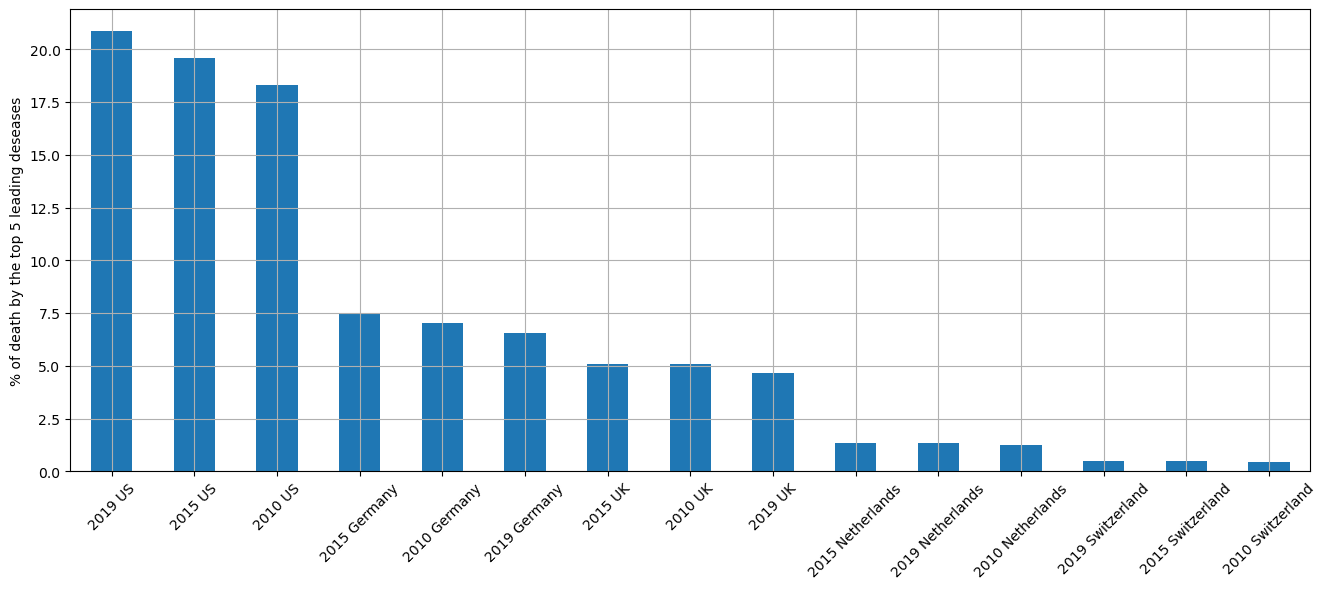

In [61]:
deaths = (md['Stroke'] + md['Other circulatory diseases'] + md['Chronic obstructive pulmonary disease'] + md['Trachea, bronchus, lung cancers'] + md['Colon and rectum cancers'])
deaths_pct = (deaths/deaths.sum()*100).sort_values(ascending=False)

deaths_pct.plot.bar(figsize=[16,6],grid=True, ylabel='% of death by the top 5 leading deseases',rot=45);